In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [2]:
# keras.datasets.mnist.load_data()  # -> data and test data


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
print("Training samples: ", len(X_train))
print("Test samples: ", len(X_test))

print("Shape of individual images: ", X_train[0].shape)

Training samples:  60000
Test samples:  10000
Shape of individual images:  (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

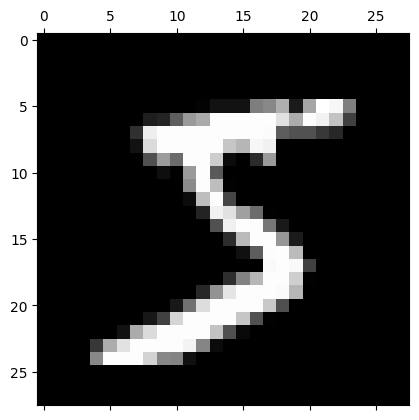

In [5]:
plt.matshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

np.uint8(5)

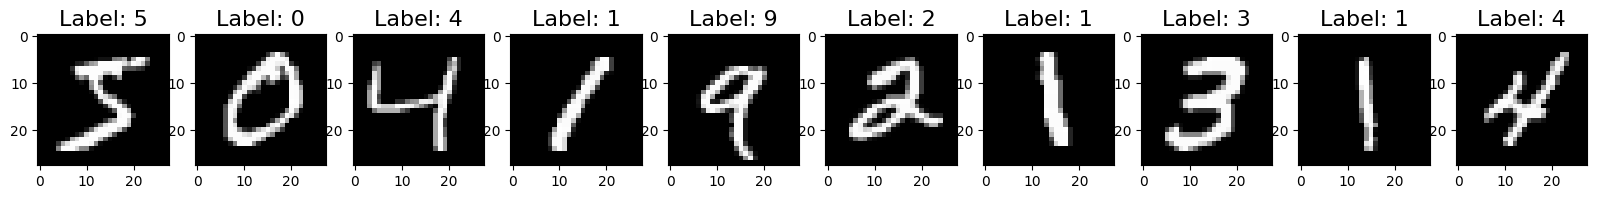

In [7]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[i]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {y_train[i]}', fontsize=16)

In [8]:
X_train.shape

(60000, 28, 28)

Lab 2025-08-13
 
Data Transformation
In this lab, you will continue working with image-based datasets, where each image is composed of pixel values. Our goal is to begin preparing this data so that it can be used effectively in a machine learning model. You will walk through several key steps in the preprocessing pipeline.
The first part involves transforming the data so that it falls within a more manageable range.
Right now, each pixel value ranges from 0 to 255.
 
Consider what effect this might have on your model, and think about how you could convert this to a more consistent format — something that many machine learning models handle better.
Once you’ve made that adjustment, try running the code and examining the output. One way to verify that your transformation worked is to inspect a single image and print out only certain values — for example, those that are greater than zero.
This can help you:
- Get a feel for what kind of data you're working with
- Confirm that your processing is doing what you expect
 
 
Reshaping the Data
Next, think about how the image data is currently structured.
Each image is a 2D array — in this case, 28 by 28 pixels.
However, many machine learning algorithms expect input in a different format.
Reflect on how you might reshape or reorganize the data so that each image is represented as a single vector rather than a matrix.
 
Checking the Shape
Once you've restructured the data, it's a good idea to print out the shape of the dataset both before and after this transformation.
Doing so will help you:
- Understand how the data has changed
- Confirm that your reshaping step worked as intended
 
Things to Reflect On:
- Why might it be helpful to scale pixel values to a different range?
- How does viewing specific pixel values help you debug your preprocessing steps?
- Why do some models require flat vectors instead of 2D matrices?
- How does reshaping the data affect the input size for your future model?
 
 
Final Note
Take your time and make sure you understand why you're performing each step — not just how to do it. These concepts are essential when working with real-world image data and will come up again in future labs and projects.

## Scaling Pixel Values

We scale the values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the process since smaller values make the weight adjusments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

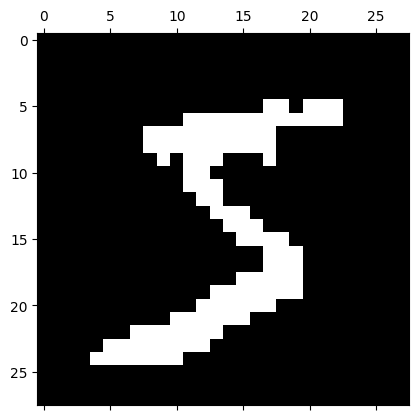

In [9]:
def convert_img(img):
    
    for i in range(len(img)):
        row = img[i]
        for j in range(len(row)):
            if row[j] < 128:
                img[i][j] = 0
            else:
                img[i][j] = 1
           
    
    return img

img = convert_img(X_train[0])
plt.matshow(img, cmap='gray')

In [10]:
X_train_bin = []

for i in range(len(X_train)):
    X_train_bin.append(convert_img(X_train[i]))

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural netwok can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [11]:
def get_1_d_list(img):
    
    new_1_d_list = []
    
    for i in range(len(img)):
        row = img[i]
        for j in range(len(row)):
            new_1_d_list.append(img[i][j])
            
    return new_1_d_list


print(get_1_d_list(X_train[0]))




[np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0), np.uint8(0)

In [ ]:
X_train_1_d_bin = []

for i in range(len(X_train)):
    X_train_1_d_bin.append(get_1_d_list(X_train[i]))

: 